
# Intro


In [ ]:
#google colab mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import pandas as pd
from math import sqrt

#pandas
from pandas import read_csv
from pandas import datetime
from pandas.tseries.offsets import DateOffset

import numpy as np
import seaborn as sns

import cv2

from statistics import mean


from sklearn.metrics import mean_squared_error


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#load CSV files
daily_country_wise_confirmed_cases= pd.read_csv('/content/drive/MyDrive/DSI30/Capstone/Datasets/monkeypoxdatasetdailyupdated/Daily_Country_Wise_Confirmed_Cases.csv')
monkey_pox_daily_cases_worldwide= pd.read_csv('/content/drive/MyDrive/DSI30/Capstone/Datasets/monkeypoxdatasetdailyupdated/Monkey_Pox_Cases_Worldwide.csv')
worldwide_case_detection_timeline= pd.read_csv('/content/drive/MyDrive/DSI30/Capstone/Datasets/monkeypoxdatasetdailyupdated/Worldwide_Case_Detection_Timeline.csv')

In [ ]:
daily_country_wise_confirmed_cases.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,66,0,0,0,0


In [ ]:
#fixing up dataframe to visualize daily_country_wise_confirmed_cases
df = pd.DataFrame(daily_country_wise_confirmed_cases.sum())
df = df.iloc[1: , :]
df.index = pd.to_datetime(df.index)
store = range(0,121)
df['index'] = store
df['date'] = df.index
df.set_index(df['index'], inplace = True,drop = True)
df.drop(labels='index', inplace = True, axis=1)
df.columns = ['number_confirmed_cases','date']
df

,number_confirmed_cases,date
index,,
0,3,2022-01-31
1,3,2022-02-17
2,1,2022-02-28
3,2,2022-03-04
4,6,2022-03-31
...,...,...
116,1727,2022-08-29
117,767,2022-08-30
118,872,2022-08-31


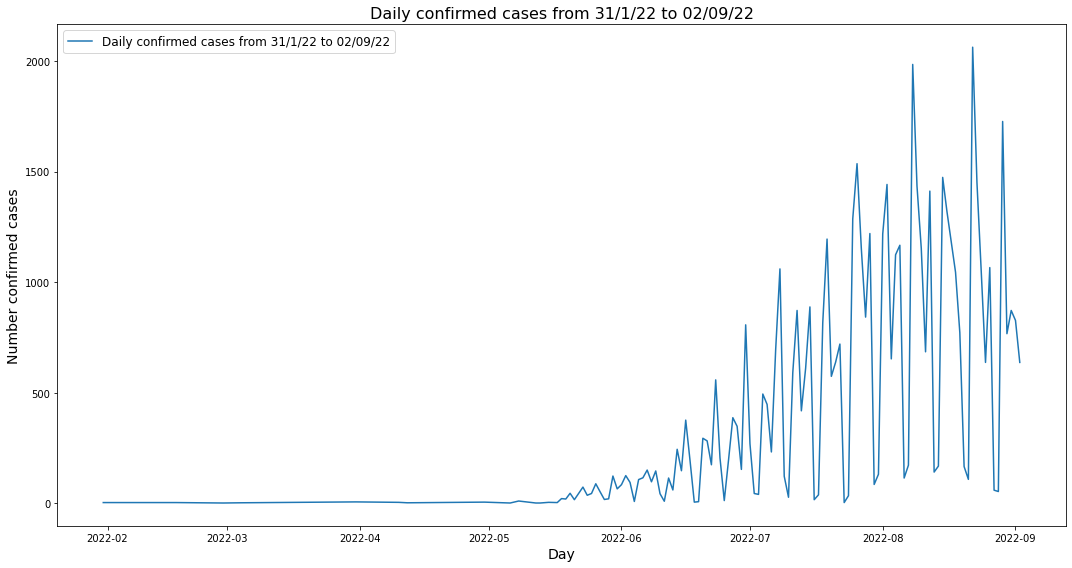

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'date',y = 'number_confirmed_cases', data = df, ci = None, label = "Daily confirmed cases from 31/1/22 to 02/09/22")
plt.legend(fontsize = 12)
plt.title('Daily confirmed cases from 31/1/22 to 02/09/22', fontsize=16)
plt.xlabel('Day',fontsize=14)
plt.ylabel('Number confirmed cases',fontsize=14)
plt.tight_layout()

In [ ]:
#rolling mean of 3 days
df2 = df.rolling(30).mean()

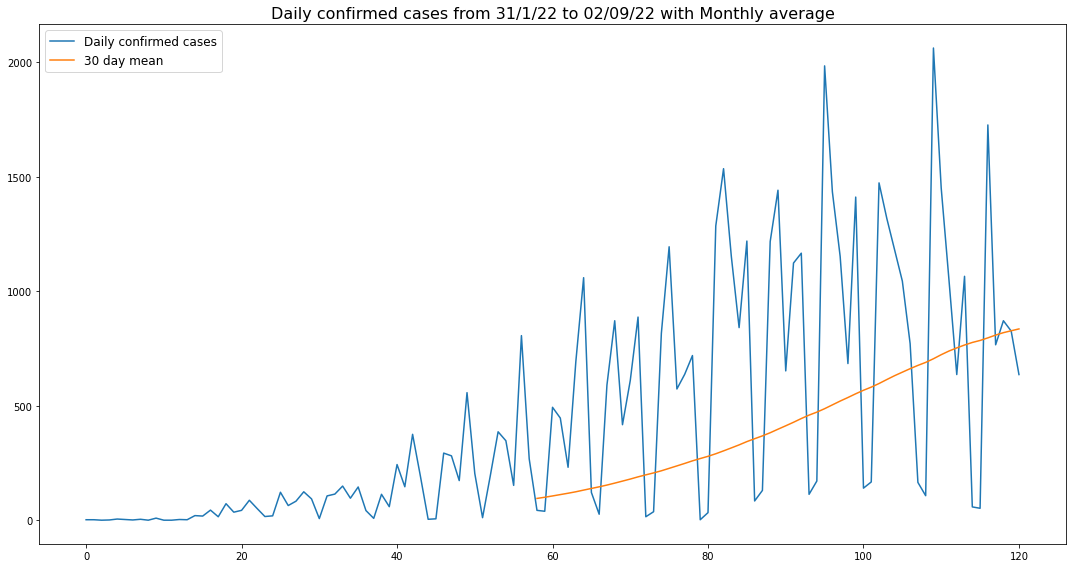

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Daily confirmed cases from 31/1/22 to 02/09/22 with Monthly average', fontsize=16)
plt.plot(df['number_confirmed_cases'],label = "Daily confirmed cases")
plt.plot(df2['number_confirmed_cases'].rolling(30).mean(),label = "30 day mean")
plt.legend(fontsize = 12)
plt.tight_layout();

## ARIMA model

In [ ]:
df3 = df
df3 = df3.set_index('date')
df3.index.name = None
df3['number_confirmed_cases'] = df3['number_confirmed_cases'].astype('int')
df3

,number_confirmed_cases
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
...,...
2022-08-29,1727
2022-08-30,767
2022-08-31,872
2022-09-01,827


In [ ]:
# data = pd.Series(df3.number_confirmed_cases, index=df3.index)
# data

In [ ]:
# Set training data to be first 80% of rows.
train = df3.iloc[0:96]
# Set training data to be last 20% of rows.
test = df3.iloc[96:]

In [ ]:
#manual
ar1 = SARIMAX(train, order = (2, 1, 0), seasonal_order = (1, 0, 2, 10))
#p,d,q
#p is the order (number of time lags) of the autoregressive model
#d is the degree of differencing (the number of times the data have had past values subtracted)
#q is the order of the moving-average

# Fit AR(1) model.
model = ar1.fit()
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                  number_confirmed_cases   No. Observations:                   96
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 10)   Log Likelihood                -668.991
Date:                                 Tue, 06 Sep 2022   AIC                           1349.981
Time:                                         07:41:08   BIC                           1365.304
Sample:                                              0   HQIC                          1356.173
                                                  - 96                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3985      0.056     -7.167      0.000      -0.508      -0

https://analyzingalpha.com/interpret-arima-results

General Information:  
Dep. Variable – number_confirmed_cases, What we’re trying to predict.  
Model – The type of model we’re using. AR, MA, ARIMA.  
Date – The date we ran the model  
Time – The time the model finished  
Sample – The range of the data  
No. Observations – The number of observations  
  
Fit analyis:  
Log-Likelihood, AIC, BIC, and HQIC help compare one model with another.  
log-likelihood function identifies a distribution that fits best with the  sampled data. While it’s useful,
AIC and BIC punish the model for complexity, which helps make our ARIMA   model parsimonious  
Akaike’s Information Criterion (AIC) determine the strength of the linear regression model. The AIC penalizes a model for adding parameters since more parameters will always increase the maximum likelihood value.  
Bayesian Information Criterion (BIC), like the AIC, also punishes a model for complexity, but it also incorporates the number of rows in the data.  
Hannan-Quinn Information Criterion (HQIC), like AIC and BIC, is another criterion for model selection; however, it’s not used as often in practice.  
  
Term Significance:  
ar.L1, ar.L2, ar.L3 = lag variables  
if their P value is higher than 0.05, they are not statistically significant. (our model is <0.05)  
const (constant beta) = independent variable  
sigma2 or epsilon = error term  
  
Assumptions:  
Ljung-Box (modified Box-Pierce test) =tests that the errors are white noise  
The Ljung-Box (L1) (Q) is the LBQ test statistic at lag 1 is, the Prob(Q) is 0.59, and the p-value is 0.29.  
probability > 0.05, we can’t reject the null that the errors are white noise.  
  
Heteroscedasticity = tests that the error residuals are homoscedastic or have the same variance  
The summary performs White’s test  
Our summary statistics show a test statistic of 18.67 and a p-value of 0.00, 
which means we reject the null hypothesis and our residuals show variance.  
  
Jarque-Bera =tests for the normality of errors  
test statistic of 132.78 with a probability of 0  
reject the null hypothesis, and the data is not normally distributed
the distribution has a positive skew (bigger on the right) and a large kurtosis.

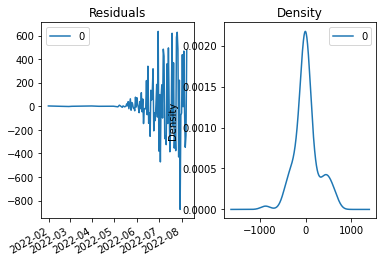

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residuals does not have a pattern, deviate around 0. Constant mean and variance.

In [ ]:
# Generate predictions based on test set.
preds = model.predict(start=96, end=120)

In [ ]:
# Evaluate predictions.
print(mean_squared_error(test['number_confirmed_cases'], preds))

222220.17806729532


In [ ]:
train['date'] = train.index
train = train[['date', 'number_confirmed_cases']]
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2022-01-31 to 2022-08-08
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    96 non-null     datetime64[ns]
 1   number_confirmed_cases  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


In [ ]:
test['date'] = test.index
test = test[['date', 'number_confirmed_cases']]
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2022-08-09 to 2022-09-02
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    25 non-null     datetime64[ns]
 1   number_confirmed_cases  25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 600.0 bytes


In [ ]:
df_preds = pd.DataFrame(preds)
df_preds['date'] = test.index
df_preds.index = test.index
df_preds = df_preds[['date', 'predicted_mean']]
df_preds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2022-08-09 to 2022-09-02
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            25 non-null     datetime64[ns]
 1   predicted_mean  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 600.0 bytes


In [ ]:
# Forecast
df_preds2= df_preds.drop('date', axis=1)
fc_series = df_preds2.squeeze()
fc_series

2022-08-09    1468.987923
2022-08-10     460.638881
2022-08-11     895.603649
2022-08-12    1185.827740
2022-08-13     388.433098
2022-08-14     852.742791
2022-08-15    1933.025253
2022-08-16    1663.815875
2022-08-17     753.299127
2022-08-18    1025.160136
2022-08-19     970.630026
2022-08-20     562.020342
2022-08-21    1015.334444
2022-08-22    1655.549900
2022-08-23    1282.730147
2022-08-24     903.101473
2022-08-25     878.511217
2022-08-26     606.975065
2022-08-27     712.770384
2022-08-28    1375.268518
2022-08-29    1521.477402
2022-08-30    1091.391869
2022-08-31     964.542972
2022-09-01     994.557067
2022-09-02     904.380827
Name: predicted_mean, dtype: float64

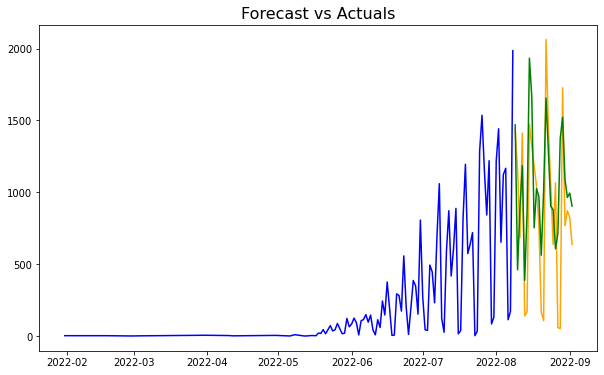

In [ ]:
# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['number_confirmed_cases'], color = 'blue', label='training')
plt.plot(test['number_confirmed_cases'], color = 'orange', label='actual')
plt.plot(fc_series, color = 'green', label='predict')
plt.title(label = 'Forecast vs Actuals', fontsize=16)
plt.show();

In [ ]:
train = df3.iloc[0:96]
#gridsearch
# Starting MSE and (P, D, Q).
mse = 99 * (10 ** 16)
final_P = 0
final_D = 0
final_Q = 0

for P in range(5):
    for Q in range(5):
        for D in range(5):
            try:
                # Instantiate SARIMA model.
                sarima = SARIMAX(train['number_confirmed_cases'],
                                 order = (P, D, Q))

                # Fit SARIMA model.
                model = sarima.fit()

                # Generate predictions based on training set.
                # Start at time period 0 and end at 96.
                preds = model.predict(start=0, end=95)

                # Evaluate predictions.
                print(f'The MSE for ({P},{D},{Q} is: {mean_squared_error(train["number_confirmed_cases"], preds)}')
                
                # Save for final report.
                if mse > mean_squared_error(train['number_confirmed_cases'], preds):
                    mse = mean_squared_error(train['number_confirmed_cases'], preds)
                    final_P = P
                    final_D = D
                    final_Q = Q
                
            except:
                pass

print(f'Our model that minimizes MSE on the training data is the SARIMA({final_P},{final_D},{final_Q}).')
print(f'This model has an MSE of {mse}.')

The MSE for (0,0,0 is: 292915.6875
The MSE for (0,1,0 is: 166011.94791666666
The MSE for (0,2,0 is: 330520.15569218295
The MSE for (0,3,0 is: 773048.6492146206
The MSE for (0,4,0 is: 2107108.502133141
The MSE for (0,0,1 is: 162725.38514587635
The MSE for (0,1,1 is: 114209.57883054709
The MSE for (0,2,1 is: 167748.9744960777
The MSE for (0,3,1 is: 334628.5793393789
The MSE for (0,4,1 is: 783385.8128744598
The MSE for (0,0,2 is: 129465.8935487927
The MSE for (0,1,2 is: 98929.80149254086
The MSE for (0,2,2 is: 107465.65354433302
The MSE for (0,3,2 is: 173633.56755285393
The MSE for (0,4,2 is: 347067.96921779297
The MSE for (0,0,3 is: 122546.65269808604
The MSE for (0,1,3 is: 79330.94648701751
The MSE for (0,2,3 is: 93429.77390594076
The MSE for (0,3,3 is: 102232.93354824303
The MSE for (0,4,3 is: 182079.9541733896
The MSE for (0,0,4 is: 97199.710541822
The MSE for (0,1,4 is: 58974.50695423445
The MSE for (0,2,4 is: 71879.93840524695
The MSE for (0,3,4 is: 90953.53227533684
The MSE for (0,

In [ ]:
train = df3.iloc[0:96]
#gridsearch
# Starting MSE and (P, D, Q).
mse = 99 * (10 ** 16)
final_P = 0
final_D = 0
final_Q = 0

for P in range(5):
    for Q in range(5):
        for D in range(5):
            try:
                # Instantiate SARIMA model.
                sarima = SARIMAX(train['number_confirmed_cases'],
                                 order = (4, 1, 4),              # (p, d, q)
                                 seasonal_order = (P, D, Q, 10)) # (P, D, Q, S)

                # Fit SARIMA model.
                model = sarima.fit()

                # Generate predictions based on training set.
                # Start at time period 0 and end at 96.
                preds = model.predict(start=0, end=95)

                # Evaluate predictions.
                print(f'The MSE for (4, 1, 4)x({P},{D},{Q},10) is: {mean_squared_error(train["number_confirmed_cases"], preds)}')
                
                # Save for final report.
                if mse > mean_squared_error(train['number_confirmed_cases'], preds):
                    mse = mean_squared_error(train['number_confirmed_cases'], preds)
                    final_P = P
                    final_D = D
                    final_Q = Q
                
            except:
                pass

print(f'Our model that minimizes MSE on the training data is the SARIMA(4, 1, 4)x({final_P},{final_D},{final_Q},10).')
print(f'This model has an MSE of {mse}.')

The MSE for (4, 1, 4)x(0,0,0,10) is: 31333.19301576015
The MSE for (4, 1, 4)x(0,1,0,10) is: 35862.77376538807
The MSE for (4, 1, 4)x(0,2,0,10) is: 112624.64531044809
The MSE for (4, 1, 4)x(0,3,0,10) is: 161664.88275534267
The MSE for (4, 1, 4)x(0,4,0,10) is: 2045276.5648832365
The MSE for (4, 1, 4)x(0,0,1,10) is: 29405.44164357825
The MSE for (4, 1, 4)x(0,1,1,10) is: 32544.830647874227
The MSE for (4, 1, 4)x(0,2,1,10) is: 52022.06104658121
The MSE for (4, 1, 4)x(0,3,1,10) is: 191562.82115086672
The MSE for (4, 1, 4)x(0,4,1,10) is: 590655.9991101056
The MSE for (4, 1, 4)x(0,0,2,10) is: 28992.792666518766
The MSE for (4, 1, 4)x(0,1,2,10) is: 32231.25572272422
The MSE for (4, 1, 4)x(0,2,2,10) is: 49336.73537309483
The MSE for (4, 1, 4)x(0,3,2,10) is: 185553.98280291012
The MSE for (4, 1, 4)x(0,4,2,10) is: 444907.8712837063
The MSE for (4, 1, 4)x(0,0,3,10) is: 28045.254178643194
The MSE for (4, 1, 4)x(0,1,3,10) is: 31525.668445623654
The MSE for (4, 1, 4)x(0,2,3,10) is: 48819.52520073669
T

In [ ]:
ar1 = SARIMAX(train, order = (4, 1, 4), seasonal_order = (0, 0, 3, 10))
model = ar1.fit()

In [ ]:
future_dates=[df3.index[-1]+ DateOffset(days=x)for x in range(0,122)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df

,number_confirmed_cases,date
2022-09-03,NaN,NaN
2022-09-04,NaN,NaN
2022-09-05,NaN,NaN
2022-09-06,NaN,NaN
2022-09-07,NaN,NaN
...,...,...
2022-12-28,NaN,NaN
2022-12-29,NaN,NaN
2022-12-30,NaN,NaN
2022-12-31,NaN,NaN


In [ ]:
test.tail()

,date,number_confirmed_cases
2022-08-29,2022-08-29,1727
2022-08-30,2022-08-30,767
2022-08-31,2022-08-31,872
2022-09-01,2022-09-01,827
2022-09-02,2022-09-02,637


In [ ]:
future_df=pd.concat([df3,future_datest_df])
future_df = pd.DataFrame(future_df['number_confirmed_cases'])
future_df

,number_confirmed_cases
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
...,...
2022-12-28,NaN
2022-12-29,NaN
2022-12-30,NaN
2022-12-31,NaN


In [ ]:
predictions = model.predict(start=train.shape[0]+test.shape[0],end=(train.shape[0]+test.shape[0]-1+121), dynamic= True)

In [ ]:
predictions

121     367.153758
122     802.668418
123    1702.556041
124    1325.199174
125     559.832591
          ...     
237     904.741942
238     912.559168
239    1002.833923
240    1026.863186
241     938.935717
Name: predicted_mean, Length: 121, dtype: float64

In [ ]:
df_preds2 = pd.DataFrame(predictions)
df_preds2['date'] = future_datest_df.index
df_preds2 = df_preds2.set_index('date')
df_preds2.index.name = None
df_preds2 = df_preds2.rename({'predicted_mean': 'number_confirmed_cases'}, axis=1)
df_preds2.head()

,number_confirmed_cases
2022-09-03,367.153758
2022-09-04,802.668418
2022-09-05,1702.556041
2022-09-06,1325.199174
2022-09-07,559.832591


In [ ]:
future_df=pd.concat([future_df,df_preds2])
future_df= future_df.dropna()
future_df

,number_confirmed_cases
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
...,...
2022-12-28,904.741942
2022-12-29,912.559168
2022-12-30,1002.833923
2022-12-31,1026.863186


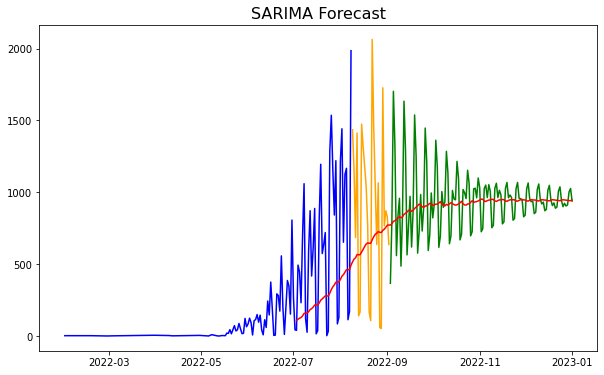

In [ ]:
# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['number_confirmed_cases'], color = 'blue', label='training')
plt.plot(test['number_confirmed_cases'], color = 'orange', label='test')
plt.plot(df_preds2, color = 'green', label='predict')
plt.plot(future_df['number_confirmed_cases'].rolling(60).mean(), color = 'red', label = "60 day mean")

plt.title(label = 'SARIMA Forecast', fontsize=16)
plt.show();

In [ ]:
monkey_pox_daily_cases_worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             122 non-null    object 
 1   Confirmed_Cases     122 non-null    float64
 2   Suspected_Cases     122 non-null    float64
 3   Hospitalized        122 non-null    float64
 4   Travel_History_Yes  122 non-null    float64
 5   Travel_History_No   122 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
worldwidemonkeypox = monkey_pox_daily_cases_worldwide.sort_values(by=['Confirmed_Cases'], ascending=False)
worldwidemonkeypox

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
3,United States,19852.0,0.0,4.0,41.0,11.0
2,Spain,6645.0,0.0,13.0,2.0,0.0
37,Brazil,5197.0,0.0,4.0,20.0,4.0
7,France,3638.0,0.0,1.0,2.0,1.0
10,Germany,3493.0,0.0,18.0,19.0,16.0
...,...,...,...,...,...,...
49,Kosovo,0.0,0.0,1.0,0.0,0.0
48,Cayman Islands,0.0,1.0,0.0,0.0,0.0
45,Haiti,0.0,0.0,0.0,0.0,0.0
44,Mauritius,0.0,0.0,0.0,2.0,1.0


In [ ]:
worldwide_case_detection_timeline.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
